In [1]:
import pandas as pd
import glob, os
import numpy as np
import pickle 
import matplotlib.pyplot as plt
from  scipy.stats import circmean, circstd
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


In [2]:
PATH = '/Volumes/home/Research/STEP/02_Station_result_csv/'
SAVEpath = '/Volumes/home/Research/STEP/09_histogram_stat/catalog3'
phase= 'SKS'
DATApath = f'/Volumes/home/Research/STEP/01_Split/DATA_*_Mw*'
Class_west=['BCA','ABST','TKBL','AMBR','URAV','ONI']
Class_far=['GUDA','GUDG','DDFL','LGD','GANJ']


### for catalog2
Class_lesser=['BKRG','BURN','BRNG','AKH','GANZ','BGD','AZMN','BAUR','DMNI','TRLT','TRLG','KZRT','TBLG']
Class_am=['SHEN','ZARN','VAND','BYUR','ARZA','GNI','GERK','LICH','TSAP','TASB','MAGY','ALAV','NAVR','QZX']

### for catalog1
# Class_lesser=['BKRG','BURN','BRNG','AKH','GANZ','BGD','AZMN','BAUR','DMNI','TRLT','TRLG','KZRT','MAGY','ALAV','NAVR','QZX','TBLG']
# Class_am=['SHEN','ZARN','VAND','BYUR','ARZA','GNI','GERK','LICH','TSAP','TASB']

### for catalog3
Class_west = Class_west+Class_lesser
Class_lesser = []

Class = {'West':Class_west,
            'Lesser': Class_lesser,
            'AM': Class_am,
            'Far': Class_far}

remove = '/Volumes/home/Research/STEP/05_Station_result_statistics/V4_Remove_catalog.txt'


In [3]:
def Calc_rho(RCdt, SCdt):
    rho = RCdt/SCdt 
    return rho
def Calc_Phi(RCPhi, SCPhi):
    Phi = max (abs(RCPhi-SCPhi), abs(SCPhi-RCPhi))
    if Phi > 90: Phi = 180 - Phi
    return Phi
def RCcoeff(DATApath,STA,event):
    RCfile = glob.glob(f'{DATApath}/*.{STA}/{event}/RC_res_manual.pkl')[0]
    RCpkl  = pickle.load(open(RCfile, "rb"))
    coeff  = abs(RCpkl.errc)
    return coeff
    
def angle_mean(dt, phi, ddt, dphi):
    dt=np.array(dt)
    phi=np.array(phi)
    ddt=np.array(ddt)
    dphi=np.array(dphi)
    x = dt*np.cos(2*phi*np.pi/180.0)
    y = dt*np.sin(2*phi*np.pi/180.0)
    c = x + 1j*y
    m = np.mean(c)

    phase = np.angle(m, deg=True)/2.
    radius = np.abs(m)
    dphase = np.sqrt(np.sum(dphi**2))/len(x)
    dradius = np.sqrt(np.sum(ddt**2))/len(x)
    print(phase, dphase, radius, dradius)
    return phase, dphase, radius, dradius

In [4]:
dr = pd.read_csv(remove,sep='\s+',names=['station','time','phase','a','b','c','d','e','f','g'])

## Standard 1 

In [15]:
for key in Class.keys():
    locals()[f'df_{key}'] = {'station':[],'RCphi':[],'RCDphi':[],'RCdt':[],'RCDdt':[],'SCphi':[],'SCDphi':[],'SCdt':[],'SCDdt':[],'Null':[],'Quality':[]}
    for sta in Class[key]:
        for csvpath in glob.glob(f'{PATH}/*classify/*{sta}*csv'):
            df = pd.read_csv(csvpath)
            df = df[df['Pick']==True][df['SNRQ']>=5][df['Null']==False]
            for i in range(len(df)):
                time = df['Event'].values[i]
                RCPhi = df['RCPhi'].values[i]
                RCDPhi  = df['RCPhi_std'].values[i]
                RCdt  = df['RCdt'].values[i]
                RCDdt  = df['RCdt_std'].values[i]
                SCPhi = df['SCPhi'].values[i]
                SCDPhi  = df['SCPhi_std'].values[i]
                SCdt  = df['SCdt'].values[i]
                SCDdt  = df['SCdt_std'].values[i]
                Null = df['Null'].values[i]
                Quality = df['Quality'].values[i]
                if sta in dr['station'].to_list() and time in dr['time'].to_list():
                    print(f'{sta} {time}')
                else:
                    locals()[f'df_{key}']['station'].append(sta)    
                    locals()[f'df_{key}']['RCphi'].append(RCPhi)
                    locals()[f'df_{key}']['RCdt'].append(RCdt)
                    locals()[f'df_{key}']['RCDphi'].append(RCDPhi)
                    locals()[f'df_{key}']['RCDdt'].append(RCDdt)
                    locals()[f'df_{key}']['SCphi'].append(SCPhi)
                    locals()[f'df_{key}']['SCdt'].append(SCdt)
                    locals()[f'df_{key}']['SCDphi'].append(SCDPhi)
                    locals()[f'df_{key}']['SCDdt'].append(SCDdt)
                    locals()[f'df_{key}']['Null'].append(Null)
                    locals()[f'df_{key}']['Quality'].append(Quality)                    
    locals()[f'df_{key}'] = pd.DataFrame(locals()[f'df_{key}'])

/var/folders/sp/pnngww1n0q31w2plgbk53rc00000gn/T/ipykernel_6647/1120472876.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['Pick']==True][df['SNRQ']>=5][df['Null']==False]


TBLG 20130523_210746
ZARN 20180211_231415
VAND 20160729_211826
VAND 20180211_231415
GNI 20130514_003226
GNI 20200613_210830
GNI 20131123_074832
GUDG 20131123_074832


## Standard2

In [9]:
for key in Class.keys():
    locals()[f'df_{key}'] = {'station':[],'RCphi':[],'RCDphi':[],'RCdt':[],'RCDdt':[],'SCphi':[],'SCDphi':[],'SCdt':[],'SCDdt':[],'Null':[],'Quality':[]}
    for sta in Class[key]:
#         print('='*50)
        for csvpath in glob.glob(f'{PATH}/*classify/*{sta}*csv'):
            df = pd.read_csv(csvpath)
            df = df[df['Pick']==True][df['SNRQ']>=5][df['Null']==False]
            for i in range(len(df)):
                evtTime = df['Event'].values[i]
                RCPhi = df['RCPhi'].values[i]
                RCDPhi  = df['RCPhi_std'].values[i]
                RCdt  = df['RCdt'].values[i]
                RCDdt  = df['RCdt_std'].values[i]
                SCPhi = df['SCPhi'].values[i]
                SCDPhi  = df['SCPhi_std'].values[i]
                SCdt  = df['SCdt'].values[i]
                SCDdt  = df['SCdt_std'].values[i]
                CpH = df['CpH'].values[i]
                Null = df['Null'].values[i]
                Quality = df['Quality'].values[i]
                
                rho = Calc_rho(RCdt, SCdt)
                phi = Calc_Phi(RCPhi, SCPhi)
                coeff = RCcoeff(DATApath,sta,evtTime)
                
                if CpH <=0.76 and SCdt<2.5 :
                    Null = False
                    if (SCDPhi <20 and SCDdt<0.5 and coeff >=0.8):
                        Quality = 'Good'
                    elif phi <8 and 0.8<rho<1.1:
                        Quality = 'Good'
                    elif (SCDPhi <=30 and SCDdt<=1.0 and coeff >=0.8) :
                        Quality = 'Fair'
                    elif phi <=25 and 0.7<=rho<=1.2: 
                        Quality = 'Fair'
                    else: 
                        Quality = 'Poor'
                else:
                    Null = True
                    if CpH>=0.9:
                        Quality = 'Good'
                    else: Quality = 'Fair'
                if sta in dr['station'].to_list() and evtTime in dr['time'].to_list():
                    print(f'{sta} {time}')
                else:
                    locals()[f'df_{key}']['station'].append(sta)    
                    locals()[f'df_{key}']['RCphi'].append(RCPhi)
                    locals()[f'df_{key}']['RCdt'].append(RCdt)
                    locals()[f'df_{key}']['RCDphi'].append(RCDPhi)
                    locals()[f'df_{key}']['RCDdt'].append(RCDdt)
                    locals()[f'df_{key}']['SCphi'].append(SCPhi)
                    locals()[f'df_{key}']['SCdt'].append(SCdt)
                    locals()[f'df_{key}']['SCDphi'].append(SCDPhi)
                    locals()[f'df_{key}']['SCDdt'].append(SCDdt)
                    locals()[f'df_{key}']['Null'].append(Null)
                    locals()[f'df_{key}']['Quality'].append(Quality)
    locals()[f'df_{key}'] = pd.DataFrame(locals()[f'df_{key}'])

/var/folders/sp/pnngww1n0q31w2plgbk53rc00000gn/T/ipykernel_6647/404345720.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['Pick']==True][df['SNRQ']>=5][df['Null']==False]
/var/folders/sp/pnngww1n0q31w2plgbk53rc00000gn/T/ipykernel_6647/404345720.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['Pick']==True][df['SNRQ']>=5][df['Null']==False]


TBLG 20111014_033515
ZARN 20111014_033515
VAND 20111014_033515
VAND 20111014_033515
GNI 20111014_033515
GNI 20111014_033515
GNI 20111014_033515
GUDG 20111014_033515


## To plot

qwqwq
45.3224632327 2.4656765892 1.05606451915 0.0669253098917
43.1242535836 4.62815408585 1.02924735312 0.100648408425


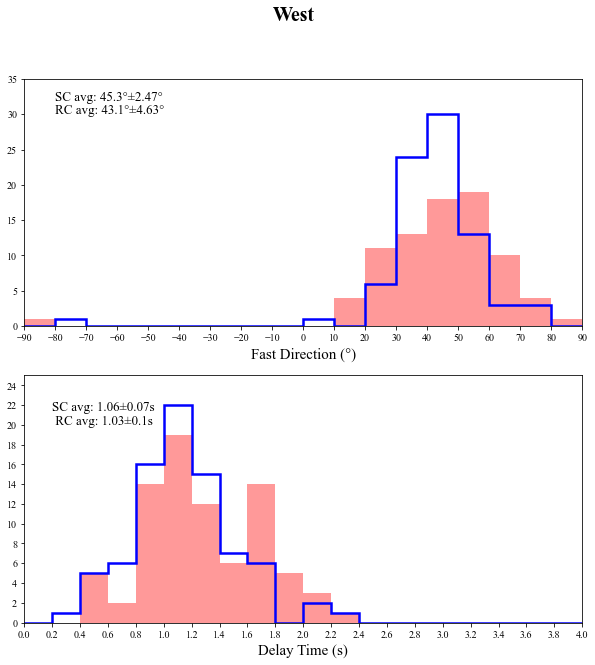

qwqwq
nan nan nan nan
nan nan nan nan


/Users/tong/opt/anaconda3/envs/split/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/tong/opt/anaconda3/envs/split/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in cdouble_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/sp/pnngww1n0q31w2plgbk53rc00000gn/T/ipykernel_62156/4134989432.py:26: RuntimeWarning: invalid value encountered in double_scalars
  dphase = np.sqrt(np.sum(dphi**2))/len(x)
/var/folders/sp/pnngww1n0q31w2plgbk53rc00000gn/T/ipykernel_62156/4134989432.py:27: RuntimeWarning: invalid value encountered in double_scalars
  dradius = np.sqrt(np.sum(ddt**2))/len(x)


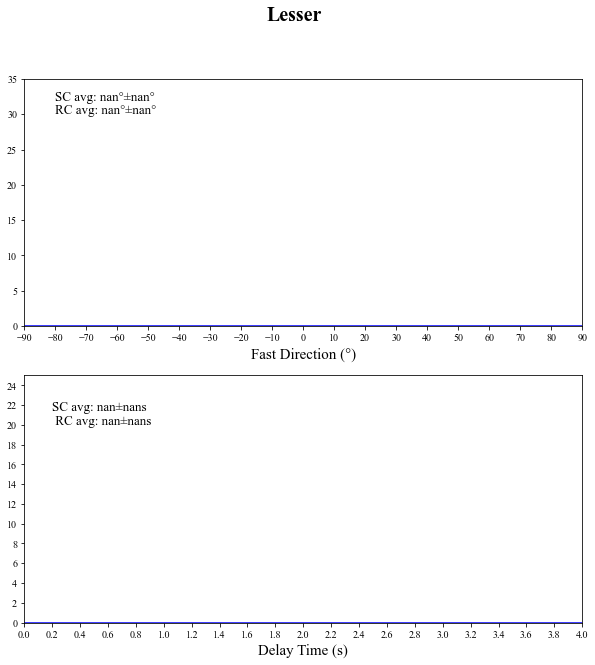

qwqwq
49.0115319648 4.20670531149 0.67817792046 0.0988525085315
53.2173892402 5.45065482626 0.660693781688 0.119834464011


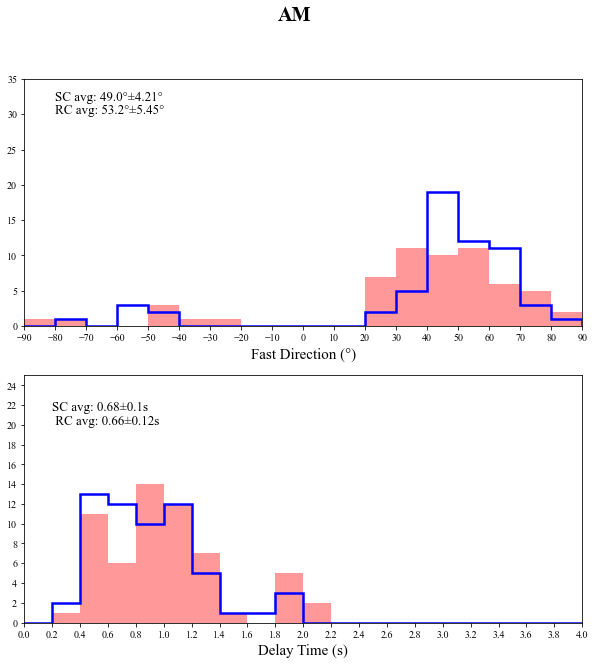

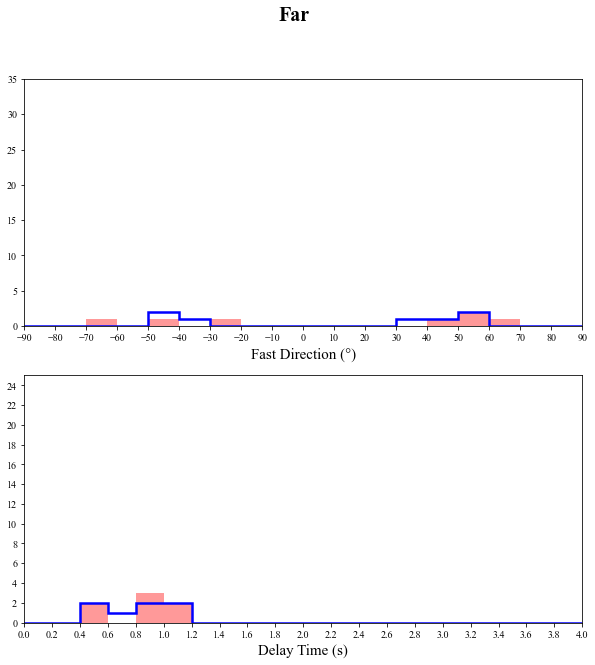

In [110]:
plt.rc('font',family='Times New Roman')
bin_phi=np.arange(-90,90+1,10)
bin_dt=np.arange(0,4+0.1,0.2)
for key in Class.keys():
    plt.figure(figsize=(10,10))
    newdf = locals()[f'df_{key}'][locals()[f'df_{key}']['Null']==False]
    newdf = newdf[newdf['Quality']!='Poor']

    ax1 = plt.subplot(211)
    nR,binsS,jR=plt.hist(newdf['RCphi'],bins=bin_phi, color='blue',linewidth=2.5,histtype='step') #alpha=0.3, width=0.2
    nS,binsS,jR=plt.hist(newdf['SCphi'],bins=bin_phi, width=10, alpha=0.4,color='red')
    plt.xlim(-90,90)
    plt.ylim(0,35)
    plt.xlabel('Fast Direction (°)',fontsize=15)
    ax1.xaxis.set_major_locator(MultipleLocator(10))
    ax1.yaxis.set_major_locator(MultipleLocator(5))
    ax2 = plt.subplot(212)
    
    plt.hist(newdf['RCdt'],bins=bin_dt,color='blue',linewidth=2.5,histtype='step') #alpha=0.3, width=0.2
    plt.hist(newdf['SCdt'],bins=bin_dt,color='red', alpha=0.4, width=0.2)
    plt.xlim(0,4)
    plt.ylim(0,25)
    plt.xlabel('Delay Time (s)',fontsize=15)
    ax2.xaxis.set_major_locator(MultipleLocator(0.2))
    ax2.yaxis.set_major_locator(MultipleLocator(2))

    if key == 'West' or key == 'Lesser' or key == 'AM':
        print('qwqwq')
        avg_angle_SC,std_angle_SC,avg_dt_SC,std_dt_SC = angle_mean(newdf['SCdt'], newdf['SCphi'], newdf['SCDdt'], newdf['SCDphi'])
        avg_angle_RC,std_angle_RC,avg_dt_RC,std_dt_RC = angle_mean(newdf['RCdt'], newdf['RCphi'], newdf['RCDdt'], newdf['RCDphi'])
        plt.subplot(211)
        plt.text(-80,30,f'SC avg: {round(avg_angle_SC,1)}°±{round(std_angle_SC,2)}°\nRC avg: {round(avg_angle_RC,1)}°±{round(std_angle_RC,2)}°',fontsize=13,ha='left')
        plt.subplot(212)
        plt.text(0.2,20,f"SC avg: {round(avg_dt_SC,2)}±{round(std_dt_SC,2)}s\n RC avg: {round(avg_dt_RC,2)}±{round(std_dt_RC,2)}s",fontsize=13,ha='left')
#         plt.title(f', {round(avg_dt_SC,2)}±{round(std_dt_SC,2)}s)\n, {round(avg_dt_RC,2)}±{round(std_dt_RC,2)}s)')
#     elif key == 'AM':
#         print('ewewewewew')
#         caldf = newdf[newdf['SCphi']>0]
#         avg_angle_SC,std_angle_SC,avg_dt_SC,std_dt_SC = angle_mean(caldf['SCdt'], caldf['SCphi'], caldf['SCDdt'], caldf['SCDphi'])
#         avg_angle_RC,std_angle_RC,avg_dt_RC,std_dt_RC = angle_mean(caldf['RCdt'], caldf['RCphi'], caldf['RCDdt'], caldf['RCDphi'])
#         plt.subplot(211)
#         plt.text(x=25,y=19,s=f'SC avg: ({round(avg_angle_SC,1)}°±{round(std_angle_SC,0)}°, {round(avg_dt_SC,2)}±{round(std_dt_SC,1)}s)\nRC avg: ({round(avg_angle_RC,1)}°±{round(std_angle_RC,0)}°, {round(avg_dt_RC,2)}±{round(std_dt_RC,1)}s)',fontsize=14)            

#         caldf_ = newdf[newdf['SCphi']<0]
#         avg_angle_SC,std_angle_SC,avg_dt_SC,std_dt_SC = angle_mean(caldf_['SCdt'], caldf_['SCphi'], caldf_['SCDdt'], caldf_['SCDphi'])
#         avg_angle_RC,std_angle_RC,avg_dt_RC,std_dt_RC = angle_mean(caldf_['RCdt'], caldf_['RCphi'], caldf_['RCDdt'], caldf_['RCDphi']) 
#         plt.text(x=-80,y=8,s=f'SC avg: ({round(avg_angle_SC,1)}°±{round(std_angle_SC,0)}°, {round(avg_dt_SC,2)}±{round(std_dt_SC,1)}s)\nRC avg: ({round(avg_angle_RC,1)}°±{round(std_angle_RC,0)}°, {round(avg_dt_RC,2)}±{round(std_dt_RC,1)}s)',ha='left',fontsize=12)
    plt.suptitle(key,fontsize=20,fontweight='bold')
    plt.savefig(f'{SAVEpath}/Histogram_{key}_std2.png',dpi=150,bbox_inches='tight',facecolor='white')
    plt.savefig(f'{SAVEpath}/Histogram_{key}_std2.pdf')
    plt.show()
    plt.close()

## Only KO

In [45]:
KOresult='/Volumes/home/Research/DataBase/02_SKS_splitting/Lemnifi_etal_Turkey_SWS_individual_data_out.txt'

In [72]:
dK = pd.read_csv(KOresult,sep='\s+',\
            names=['station','phase','event','lat','lon','FD','FD_std','dt','dt_std',\
                   'num','baz','evlat','evlon','depth','rank','f','g','h'])

In [73]:
newdK = dK[dK['lat']>=39.5][dK['lon']>=40][dK['station']!='GNIxxx_IU']

/var/folders/sp/pnngww1n0q31w2plgbk53rc00000gn/T/ipykernel_6647/2410760523.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  newdK = dK[dK['lat']>=39.5][dK['lon']>=40][dK['station']!='GNIxxx_IU']


In [74]:
df_KO = {'station':[],'RCphi':[],'RCDphi':[],'RCdt':[],'RCDdt':[],'SCphi':[],'SCDphi':[],'SCdt':[],'SCDdt':[],'Null':[],'Quality':[]}
for i in range(len(newdK)):
    sta = newdK['station'].values[i]
    SCphi=newdK['FD'].values[i]
    SCDPhi=newdK['FD_std'].values[i]
    SCdt=newdK['dt'].values[i]
    SCDdt=newdK['dt_std'].values[i]    
    Rank=newdK['rank'].values[i] 
    if Rank =='A':
        Quality='Good'
    elif Rank =='B':
        Quality='Fair'  
    df_KO['station'].append(sta)    
    df_KO['RCphi'].append(np.nan)
    df_KO['RCdt'].append(np.nan)
    df_KO['RCDphi'].append(np.nan)
    df_KO['RCDdt'].append(np.nan)
    df_KO['SCphi'].append(SCphi)
    df_KO['SCdt'].append(SCdt)
    df_KO['SCDphi'].append(SCDPhi)
    df_KO['SCDdt'].append(SCDdt)
    df_KO['Null'].append(False)
    df_KO['Quality'].append(Quality)
df_KO = pd.DataFrame(df_KO)

qwqwq
46.5659436981 0.378905135237 1.1525874174 0.0130605454084


Text(0.2, 20, 'SC avg: 1.15±0.01s')

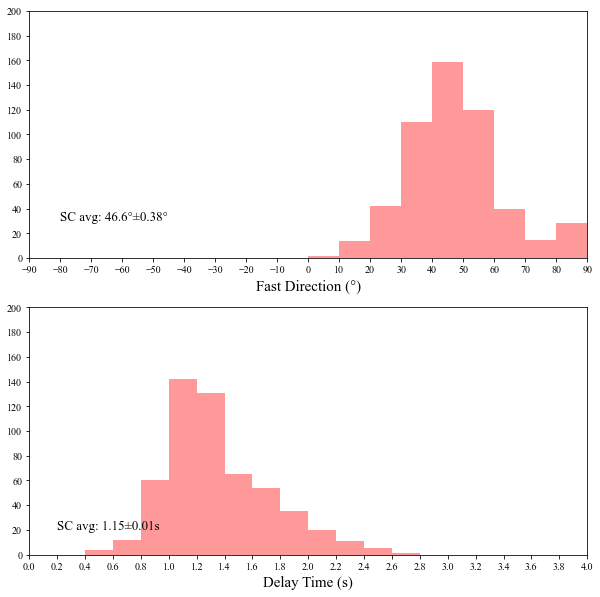

In [77]:
plt.rc('font',family='Times New Roman')
bin_phi=np.arange(-90,90+1,10)
bin_dt=np.arange(0,4+0.1,0.2)

plt.figure(figsize=(10,10))

ax1 = plt.subplot(211)
# nR,binsS,jR=plt.hist(df_KO['RCphi'],bins=bin_phi, color='blue',linewidth=2.5,histtype='step') #alpha=0.3, width=0.2
nS,binsS,jR=plt.hist(df_KO['SCphi'],bins=bin_phi, width=10, alpha=0.4,color='red')
plt.xlim(-90,90)
plt.ylim(0,200)
plt.xlabel('Fast Direction (°)',fontsize=15)
ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_major_locator(MultipleLocator(20))
ax2 = plt.subplot(212)


# plt.hist(df_KO['RCdt'],bins=bin_dt,color='blue',linewidth=2.5,histtype='step') #alpha=0.3, width=0.2
plt.hist(df_KO['SCdt'],bins=bin_dt,color='red', alpha=0.4, width=0.2)
plt.xlim(0,4)
plt.ylim(0,200)
plt.xlabel('Delay Time (s)',fontsize=15)
ax2.xaxis.set_major_locator(MultipleLocator(0.2))
ax2.yaxis.set_major_locator(MultipleLocator(20))

print('qwqwq')
avg_angle_SC,std_angle_SC,avg_dt_SC,std_dt_SC = angle_mean(df_KO['SCdt'], df_KO['SCphi'], df_KO['SCDdt'], df_KO['SCDphi'])

plt.subplot(211)
plt.text(-80,30,f'SC avg: {round(avg_angle_SC,1)}°±{round(std_angle_SC,2)}°',fontsize=13,ha='left')
plt.subplot(212)
plt.text(0.2,20,f"SC avg: {round(avg_dt_SC,2)}±{round(std_dt_SC,2)}s",fontsize=13,ha='left')